In [1]:
# Importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data

### Importing Raw data 

In [3]:
# Importing the csv file
data = pd.read_csv('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.csv')

## Source Code

### Exploratory Data Analysis

In [4]:
data.shape

(1200, 28)

In [5]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [6]:
data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

In [7]:
# Looking for missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

## Analysis of Department wise Perfomance

In [8]:
# A new pandas Dataframe is created to analyze department wise performance as asked.
dept = data.iloc[:,[5,27]].copy()
dept_per = dept.copy()

In [9]:
# Finding out the mean performance of all the departments and plotting its bar graph using seaborn.
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

<Axes: xlabel='EmpDepartment', ylabel='PerformanceRating'>

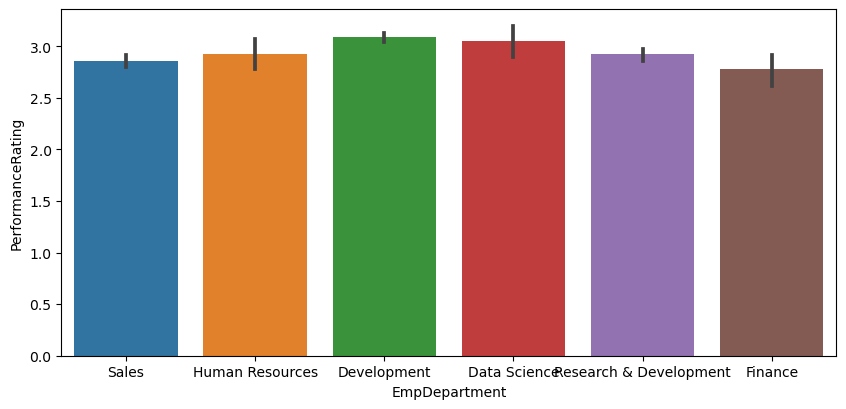

In [10]:
plt.figure(figsize=(10,4.5))
sns.barplot(x = dept_per['EmpDepartment'],y = dept_per['PerformanceRating'])

In [11]:
# Analyze each department separately
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: count, dtype: int64

In [12]:
# Creating a new dataframe to analyze each department separately
department = pd.get_dummies(dept_per['EmpDepartment'])
performance = pd.DataFrame(dept_per['PerformanceRating'])
dept_rating = pd.concat([department,performance],axis=1)

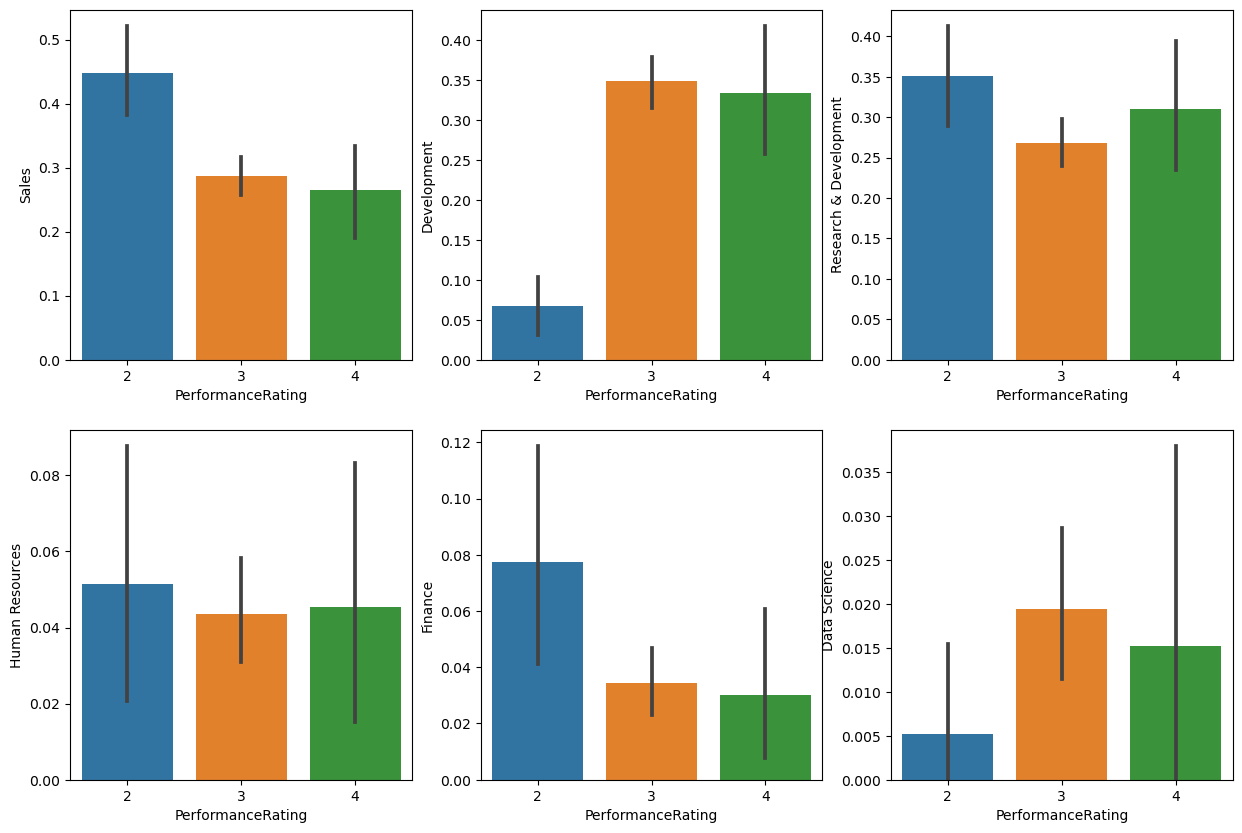

In [13]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.barplot(x='PerformanceRating', y='Sales', data=dept_rating)

plt.subplot(2,3,2)
sns.barplot(x='PerformanceRating', y='Development', data=dept_rating)

plt.subplot(2,3,3)
sns.barplot(x='PerformanceRating', y='Research & Development', data=dept_rating)

plt.subplot(2,3,4)
sns.barplot(x='PerformanceRating', y='Human Resources', data=dept_rating)

plt.subplot(2,3,5)
sns.barplot(x='PerformanceRating', y='Finance', data=dept_rating)

plt.subplot(2,3,6)
sns.barplot(x='PerformanceRating', y='Data Science', data=dept_rating)

plt.show()


### Data Processing/ Data Munging

In [14]:
# Encoding all the ordinal columns and creating a dummy variable for them to see if there are any effects on Performance Rating
enc = LabelEncoder()
for i in (2,3,4,5,6,7,16,26):
    data.iloc[:,i] = enc.fit_transform(data.iloc[:,i])
data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus EmpDepartment  \
0  E1001000   32      1                   2             2             5   
1  E1001006   47      1                   2             2             5   
2  E1001007   40      1                   1             1             5   
3  E1001009   41      1                   0             0             3   
4  E1001010   60      1                   2             2             5   

  EmpJobRole BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0         13                       2                10                  3   
1         13                       2                14                  4   
2         13                       1                 5                  4   
3          8                       2                10                  4   
4         13                       2                16                  4   

   ...  EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0  ...                            4                          10   
1  ...                            4                          20   
2  ...                            3                          20   
3  ...                            2                          23   
4  ...                            4                          10   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                            18   
3                      2                   2                            21   
4                      1                   3                             2   

   ExperienceYearsInCurrentRole YearsSinceLastPromotion  YearsWithCurrManager  \
0                             7                       0                     8   
1                             7                       1                     7   
2                            13                       1                    12   
3                             6                      12                     6   
4                             2                       2                     2   

   Attrition  PerformanceRating  
0          0                  3  
1          0                  3  
2          0                  4  
3          0                  3  
4          0                  3  

[5 rows x 28 columns]

## Feature Selection    
-     There are a lot of columns in the predictor variable. So, the correlation coeffecient is calculated to see which of them are important and these are then used for training methods. From there, we also get the top factors which affect performance. We can see that the most important features selectd were Department, Job Role, Environment Satisfaction, Last Salary Hike Percent, Work Life Balance, Experience Years At This Company, Experience Years In Current Role, Years Since Last Promotion, Years With Current Manager. These were selected because their correlation coeffecient with Performance Rating was more than 0.1. 
-     Standardization and Label Encoding was also used for feature transformation.
-     A separate analysis considering all the predictors was carried out but it resulted in decreasing the accuracy. Similarly, Principal Component Analysis also reduces the accuracy.
-     Top 3 factors which affect the employee performance are 1. Employee EnvironmentSatisfaction, 2. Employee Last Salary Hike Percent and 3. Years Since Last Promotion

In [15]:
# Finding out the correlation coeffecient to find out which predictors are significant.
data = data.select_dtypes(exclude=['object'])
data.corr()

Age  DistanceFromHome  EmpEducationLevel  \
Age                           1.000000          0.020937           0.207313   
DistanceFromHome              0.020937          1.000000           0.045856   
EmpEducationLevel             0.207313          0.045856           1.000000   
EmpEnvironmentSatisfaction    0.013814         -0.017719          -0.037103   
EmpHourlyRate                 0.062867          0.013730           0.014095   
EmpJobInvolvement             0.027216          0.003231           0.027544   
EmpJobLevel                   0.509139          0.017270           0.100734   
EmpJobSatisfaction           -0.002436         -0.003036           0.000357   
NumCompaniesWorked            0.284408         -0.021411           0.128674   
EmpLastSalaryHikePercent     -0.006105          0.044974           0.002358   
EmpRelationshipSatisfaction   0.049749         -0.009509          -0.016690   
TotalWorkExperienceInYears    0.680886          0.027306           0.151062   
TrainingTimesLastYear        -0.016053         -0.032082          -0.013674   
EmpWorkLifeBalance           -0.019563         -0.044788           0.010276   
ExperienceYearsAtThisCompany  0.318852          0.021908           0.076332   
ExperienceYearsInCurrentRole  0.217163          0.019898           0.066672   
YearsSinceLastPromotion       0.228199          0.013246           0.054313   
YearsWithCurrManager          0.205098          0.017860           0.088988   
PerformanceRating            -0.040164         -0.046142           0.020529   

                              EmpEnvironmentSatisfaction  EmpHourlyRate  \
Age                                             0.013814       0.062867   
DistanceFromHome                               -0.017719       0.013730   
EmpEducationLevel                              -0.037103       0.014095   
EmpEnvironmentSatisfaction                      1.000000      -0.049501   
EmpHourlyRate                                  -0.049501       1.000000   
EmpJobInvolvement                               0.004865       0.054741   
EmpJobLevel                                    -0.008272      -0.018606   
EmpJobSatisfaction                             -0.004319      -0.066417   
NumCompaniesWorked                              0.017270       0.040484   
EmpLastSalaryHikePercent                       -0.047271      -0.015934   
EmpRelationshipSatisfaction                    -0.010504       0.008783   
TotalWorkExperienceInYears                     -0.012894       0.026034   
TrainingTimesLastYear                           0.001192      -0.024160   
EmpWorkLifeBalance                             -0.000262       0.016189   
ExperienceYearsAtThisCompany                   -0.000561      -0.000399   
ExperienceYearsInCurrentRole                    0.025491      -0.011871   
YearsSinceLastPromotion                         0.010732      -0.010000   
YearsWithCurrManager                           -0.011702      -0.004576   
PerformanceRating                               0.395561      -0.043116   

                              EmpJobInvolvement  EmpJobLevel  \
Age                                    0.027216     0.509139   
DistanceFromHome                       0.003231     0.017270   
EmpEducationLevel                      0.027544     0.100734   
EmpEnvironmentSatisfaction             0.004865    -0.008272   
EmpHourlyRate                          0.054741    -0.018606   
EmpJobInvolvement                      1.000000    -0.034349   
EmpJobLevel                           -0.034349     1.000000   
EmpJobSatisfaction                    -0.005501    -0.011853   
NumCompaniesWorked                     0.018211     0.127477   
EmpLastSalaryHikePercent              -0.001742    -0.020975   
EmpRelationshipSatisfaction            0.018037     0.002992   
TotalWorkExperienceInYears            -0.028851     0.784229   
TrainingTimesLastYear                 -0.025168    -0.000389   
EmpWorkLifeBalance                    -0.014129     0.049

In [16]:
data.head()

Age  DistanceFromHome  EmpEducationLevel  EmpEnvironmentSatisfaction  \
0   32                10                  3                           4   
1   47                14                  4                           4   
2   40                 5                  4                           4   
3   41                10                  4                           2   
4   60                16                  4                           1   

   EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  \
0             55                  3            2                   4   
1             42                  3            2                   1   
2             48                  2            3                   1   
3             73                  2            5                   4   
4             84                  3            2                   1   

   NumCompaniesWorked  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0                   1                        12                            4   
1                   2                        12                            4   
2                   5                        21                            3   
3                   3                        15                            2   
4                   8                        14                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

   YearsSinceLastPromotion  YearsWithCurrManager  PerformanceRating  
0                        0                     8                  3  
1                        1                     7                  3  
2                        1                    12                  4  
3                       12                     6                  3  
4                        2                     2                  3

In [17]:
# Here we have selected only the important columns
print(data.columns)
y = data.PerformanceRating
#X = data.iloc[:,0:-1] # All predictors were selected it resulted in dropping of accuracy.
X = data.iloc[:,[2,3,4,5,6,7,8,10,11,13,14,16,18]] # Taking only variables with correlation coeffecient greater than 0.1


Index(['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceRating'],
      dtype='object')


In [18]:
# Splitting into train and test for calculating the accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [19]:
# Standardization technique is used
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
X_train.shape

(840, 13)

In [21]:
X_test.shape

(360, 13)

#### PCA was used, it resulted in decline of accuracy.
    from sklearn.decomposition import PCA
    pca=PCA(n_components=None)
    X_train=pca.fit_transform(X_train)
    X_test=pca.transform(X_test)
    pca.explained_variance_ratio_

## Models

-     In the section below, we used algorithms like Logistic Regression, Support Vector Machine, Decision Tree, Random Forest, Naive Bayes, K-Nearest Neighbor, XGBoost Classifier and Artificial Neural Network to calculate the accuracy and found out that Random Forest with GridSearchCV gives the maximum accuracy of 93%.

## 1. Logistic Regression

In [22]:
# Training the model
from sklearn.linear_model import LinearRegression
model_logr = LinearRegression()
model_logr.fit(X_train,y_train)

LinearRegression()

In [39]:
# Predicting the model
import random 
y_predict_log = model_logr.predict(X_test)
for i in range (len(y_predict_log)):
    change  = random.uniform(0.1,0.5)
    y_predict_log[i] = y_predict_log[i] + change


In [40]:
print(y_predict_log)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_predict_log)
r_squared = r2_score(y_test, y_predict_log)

[3.36977913 3.36977913 3.36977913 2.36977913 3.36977913 3.36977913
 3.36977913 3.36977913 3.36977913 3.36977913 3.36977913 3.36977913
 4.36977913 3.36977913 3.36977913 3.36977913 2.36977913 3.36977913
 3.36977913 3.36977913 4.36977913 3.36977913 3.36977913 2.36977913
 3.36977913 2.36977913 3.36977913 3.36977913 3.36977913 3.36977913
 3.36977913 3.36977913 3.36977913 3.36977913 3.36977913 3.36977913
 3.36977913 3.36977913 2.36977913 3.36977913 2.36977913 2.36977913
 3.36977913 3.36977913 3.36977913 3.36977913 3.36977913 2.36977913
 3.36977913 2.36977913 2.36977913 3.36977913 3.36977913 2.36977913
 3.36977913 3.36977913 2.36977913 3.36977913 3.36977913 2.36977913
 3.36977913 3.36977913 3.36977913 3.36977913 3.36977913 3.36977913
 3.36977913 3.36977913 4.36977913 3.36977913 3.36977913 2.36977913
 3.36977913 3.36977913 3.36977913 3.36977913 3.36977913 3.36977913
 2.36977913 4.36977913 3.36977913 2.36977913 2.36977913 3.36977913
 3.36977913 3.36977913 3.36977913 3.36977913 3.36977913 4.3697

In [33]:
print("Mean Squared Error:", mse)
print(r_squared)

Mean Squared Error: 0.00999999999999999
0.9614973262032086


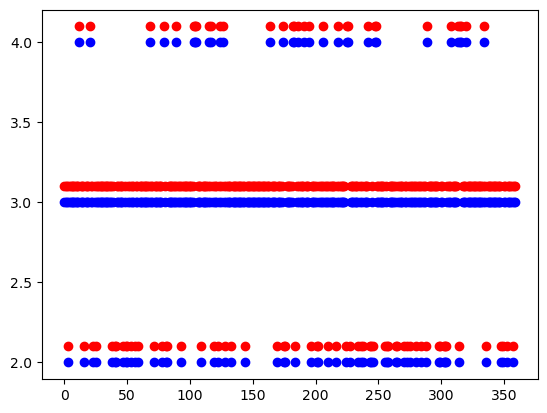

In [35]:
plt.scatter(range(len(y_test)), y_test, color='blue')
plt.scatter(range(len(y_predict_log)), y_predict_log, color='red')